/home/rishat/Miniconda/lib/python3.8/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/home/rishat/Miniconda/lib/python3.8/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


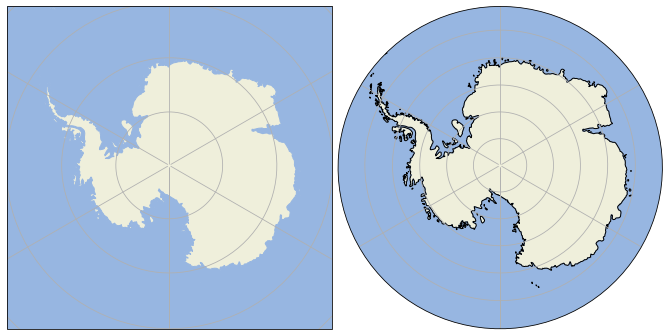

In [16]:
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=[10, 5])
ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.SouthPolarStereo())
ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.SouthPolarStereo(),
                      sharex=ax1, sharey=ax1)
fig.subplots_adjust(bottom=0.05, top=0.95,
                    left=0.04, right=0.95, wspace=0.02)

# Limit the map to -60 degrees latitude and below.
ax1.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.OCEAN)

ax1.gridlines()
ax2.gridlines()

ax2.add_feature(cfeature.LAND)
ax2.add_feature(cfeature.OCEAN)
ax2.add_feature(cfeature.COASTLINE)
ax2.add_feature(cfeature.BORDERS, linestyle=':')

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax2.set_boundary(circle, transform=ax2.transAxes)

plt.show()


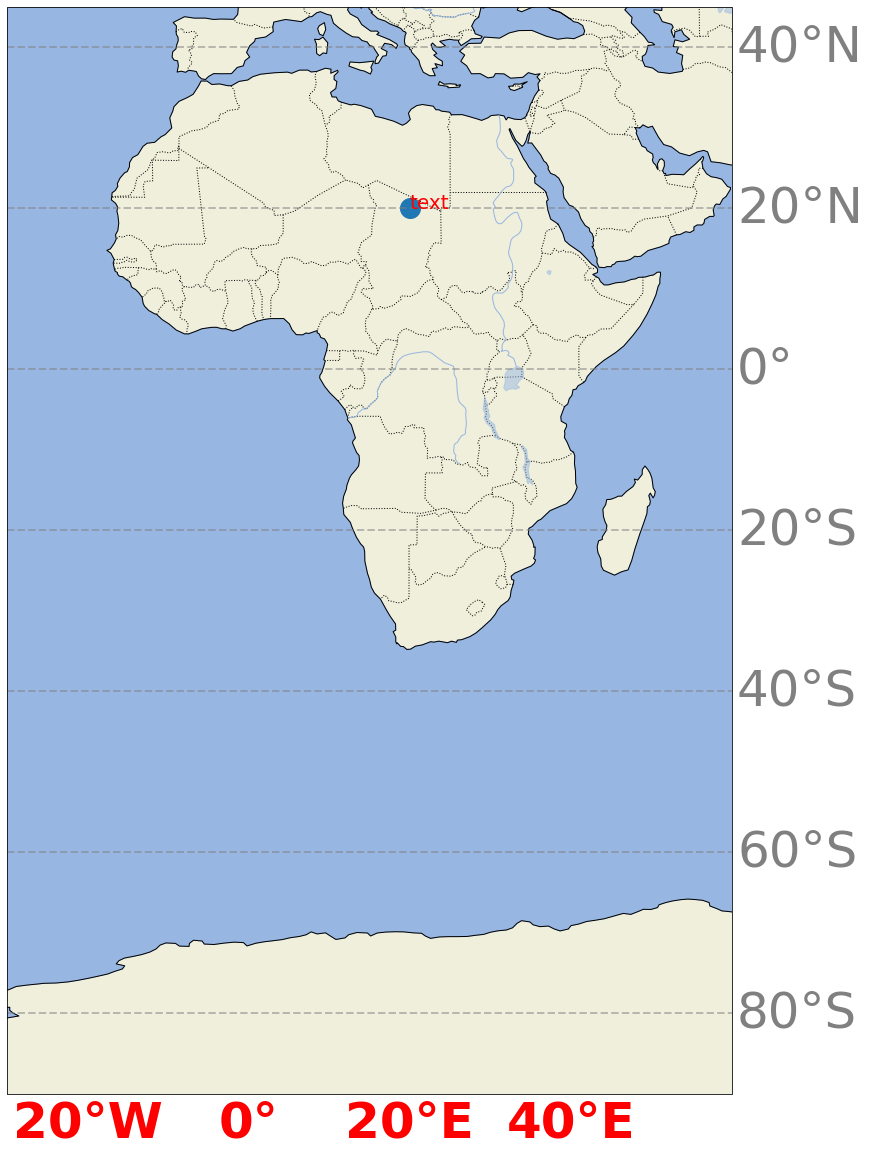

In [26]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-30, 60, -180, 45], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.text(20,20, "text", color="r", size=20)
ax.scatter([20], [20], s = 400)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
              linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlines = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylabel_style = {'size': 50, 'color': 'gray'}
gl.xlabel_style = {'size': 50, 'color': 'red', 'weight': 'bold'}

plt.show()


In [1]:
import pycuda


In [4]:
import pycuda.autoinit
import pycuda.driver as cuda

(free,total)=cuda.mem_get_info()
print("Global memory occupancy:%f%% free"%(free*100/total))

for devicenum in range(cuda.Device.count()):
    device=cuda.Device(devicenum)
    attrs=device.get_attributes()
    print(device.name())
    #Beyond this point is just pretty printing
    #print("\n===Attributes for device %d"%devicenum)
    #for (key,value) in attrs.items():
    #    print("%s:%s"%(str(key),str(value)))

Global memory occupancy:91.008802% free
GeForce GTX 1050 Ti


In [2]:
import cupy

cupy.cuda.Device(0)

<CUDA Device 0>

In [3]:
x = cupy.array([1, 2, 3])
print(x.device)

<CUDA Device 0>


In [1]:
from numba import cuda
cuda.select_device(0)

<weakproxy at 0x7f7350854220 to Device at 0x7f735084eee0>

In [6]:
cuda.gpus[0].name

b'GeForce GTX 1050 Ti'